In [58]:
import scipy
import pickle
import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam, SGD
from keras.models import Sequential
from keras import layers, Input

In [50]:
IMG_SIZE = 224
CHANNELS = 3
TRAIN_DIR = '/mnt/d/odonata_data_73/train_data'
VALID_DIR = '/mnt/d/odonata_data_73/valid_data'
EPOCHS = 20
BATCH_SIZE = 128
NUM_CLASSES = 44

In [51]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    brightness_range=[0.8,1.2],
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    shuffle=True,
    class_mode='categorical'
)

valid_generator = datagen.flow_from_directory(
    VALID_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    shuffle=True,
    class_mode='categorical'
)

Found 30800 images belonging to 44 classes.
Found 13200 images belonging to 44 classes.


In [52]:
callbacks = keras.callbacks.EarlyStopping(monitor="loss", min_delta=0, patience=3, verbose=1)

In [53]:
def build_model(num_classes):
    model = VGG16(
        include_top=True,
        weights=None,
        input_tensor=None,
        input_shape=(IMG_SIZE, IMG_SIZE, CHANNELS),
        pooling=None,
        classes=num_classes,
        classifier_activation="softmax",
    )

    optimizer = SGD()

    model.compile(
        optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
    )

    return model

In [54]:
model = build_model(num_classes=NUM_CLASSES)

In [57]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [56]:
hist = []

for _ in range(EPOCHS):
    print(f"Эпоха: {_ + 1}")
    
    hist.append(model.fit(train_generator, epochs=1, validation_data=valid_generator, callbacks=callbacks))

Эпоха: 1


2023-08-04 16:18:45.097901: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-04 16:18:45.183354: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-08-04 16:18:45.183398: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 25430 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


  2/241 [..............................] - ETA: 39:42 - loss: 3.7841 - accuracy: 0.0352

KeyboardInterrupt: 

In [15]:
model.save("/mnt/d/odonata_model_efficienb0_updated.h5")

[] [] [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


ValueError: x and y must have same first dimension, but have shapes (19,) and (0,)

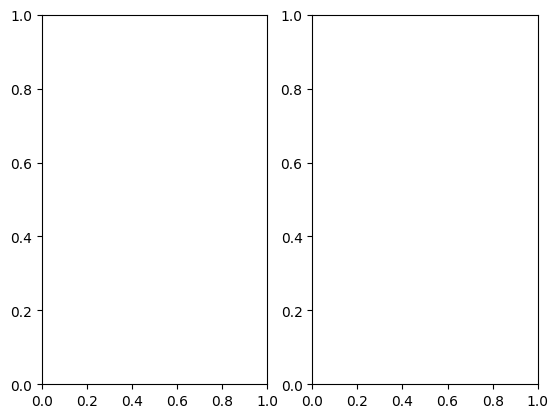

In [60]:
x = np.arange(1, EPOCHS)
y1 = np.array([_.history['val_loss'][0] for _ in hist])
y2 = np.array([_.history['val_accuracy'][0] for _ in hist])

fig, axes = plt.subplots(nrows=1, ncols=2)

# Plot history: Loss
axes[0].plot(x, y1)
axes[0].set_title('История значения потерь')
axes[0].set_ylabel('Потеря')
axes[0].set_xlabel('Номер эпохи')

# Plot history: accuracy
axes[1].plot(x, y2)
axes[1].set_title('История значения точности')
axes[1].set_ylabel('Точность в процентах')
axes[1].set_xlabel('Номер эпохи')

fig.suptitle('История обучения')
plt.tight_layout()
fig.savefig(f'/mnt/d/model_history_efficientb0_updated.png', bbox_inches='tight')

In [ ]:
for _ in range(EPOCHS):
    